In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Definição da função objetivo
def func(x):
    x1, x2 = x[0], x[1]

    if x1 >= np.abs(x2):
        return 5*np.sqrt((9*x1**2 + 16*x2**2))
    elif 0 < x1 and x1 < np.abs(x2):
        return 9*x1 + 16*np.abs(x2)
    elif x1 <= 0:
        return 9*x1 + 16*np.abs(x2) - x1**9

# Parâmetros
simplex_inicial = [[3., 1.], [3.2, 1.2], [2.7, .9]]
tol = 1e-4
max_iter = 1000
    
# Variáveis do método
num_variaveis = len(simplex_inicial[0])
num_pontos = num_variaveis + 1
alpha = 1.0 # Coeficiente de reflexão
beta = 0.5
gamma = 2.0
delta = 0.5

# Inicialização do simplex
simplex = np.array(simplex_inicial)
valores = [func(point) for point in simplex]
iteracao = 0
avaliacoes = 3

# Registros
xhist = [simplex[0]]
fxhist = [valores[0]]
simplexhist = [simplex.copy()]

# Critério de parada: número de iterações ou a diferença dos pontos do simplex
# ser pequena demais
while iteracao < max_iter and np.max(np.abs(simplex[1:] - simplex[0])) > tol:

    # Ordenar o simplex
    ordem = np.argsort(valores)
    simplex = simplex[ordem]
    valores = [func(ponto) for ponto in simplex]
    avaliacoes += 3

    # Calcular o centro do simplex, excluindo o ponto pior
    centroide = np.mean(simplex[:-1], axis=0)

    # Primeira tentativa: Reflexão
    ponto_reflexao = centroide + alpha * (centroide - simplex[-1])
    valor_reflexao = func(ponto_reflexao)
    avaliacoes += 1

    # Se a reflexão for pior que o melhor valor e melhor que o penúltimo valor
    # Substitui o pior 
    if valores[0] <= valor_reflexao < valores[-2]:
        simplex[-1] = ponto_reflexao
        valores[-1] = valor_reflexao

    else:
        
        # Se a reflexão melhorar
        if valor_reflexao < valores[0]:
            
            # Expansão: tenta expandir
            ponto_expansao = centroide + gamma * (ponto_reflexao - centroide)
            valor_expansao = func(ponto_expansao)
            avaliacoes += 1

            # Se der certo, fica com a expansão
            if valor_expansao < valor_reflexao:
                simplex[-1] = ponto_expansao
                valores[-1] = valor_expansao
            
            # Se não, fica com a reflexão
            else:
                simplex[-1] = ponto_reflexao
                valores[-1] = valor_reflexao
        else:
            
            # Se a reflexão for pior que todos, tenta contrair o pior ponto
            ponto_contracao = centroide + beta * (simplex[-1] - centroide)
            valor_contracao = func(ponto_contracao)
            avaliacoes += 1

            # Se der certo, fica com a contração
            if valor_contracao < valores[-1]:
                simplex[-1] = ponto_contracao
                valores[-1] = valor_contracao
                
            else:
                # Se não, encolhe o simplex
                for i in range(1, num_pontos):
                    simplex[i] = simplex[0] + delta * (simplex[i] - simplex[0])
                    valores[i] = func(simplex[i])
                    avaliacoes += 1

    # Registros
    iteracao += 1
    xhist.append(centroide)
    fxhist.append(valores[0])
    simplexhist.append(simplex.copy())

x = simplex[0]
fx = func(simplex[0])
simplexhist = np.array(simplexhist)

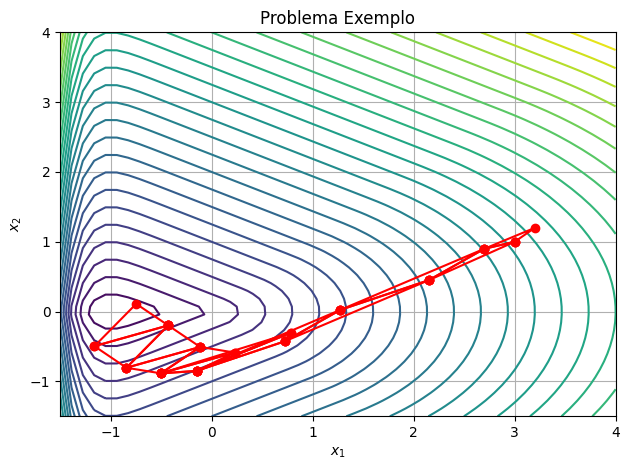

In [2]:
# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-1.5, 4),
                     np.linspace(-1.5, 4))

# Avalia função para plotar contorno
f = np.zeros(x1.shape)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        f[i, j] = func([x1[i, j], x2[i, j]])

# Plota trajetória
plt.contour(x1, x2, f, levels=30)
for n in range(simplexhist.shape[0]-46):
    plt.plot(simplexhist[n, :, 0].tolist() + [simplexhist[n, 0, 0]],
             simplexhist[n, :, 1].tolist() + [simplexhist[n, 0, 1]], '-or')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema Exemplo')
plt.grid()

plt.tight_layout()
plt.show()

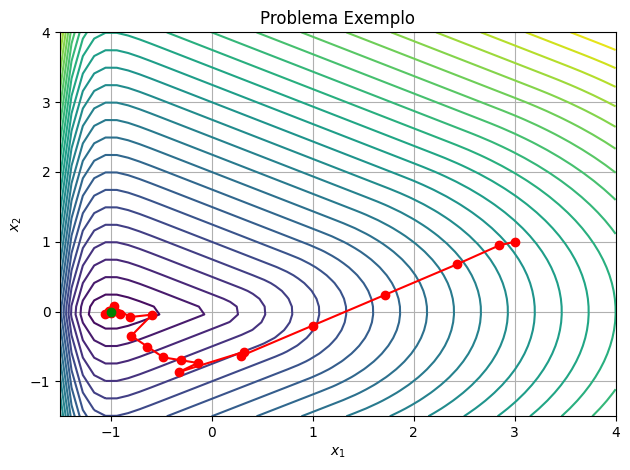

In [3]:
# Plota trajetória
plt.contour(x1, x2, f, levels=30)
xhist = np.array(xhist)
plt.plot(xhist[:, 0], xhist[:, 1], '-or')
plt.plot(x[0], x[1], 'og')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema Exemplo')
plt.grid()

plt.tight_layout()
plt.show()

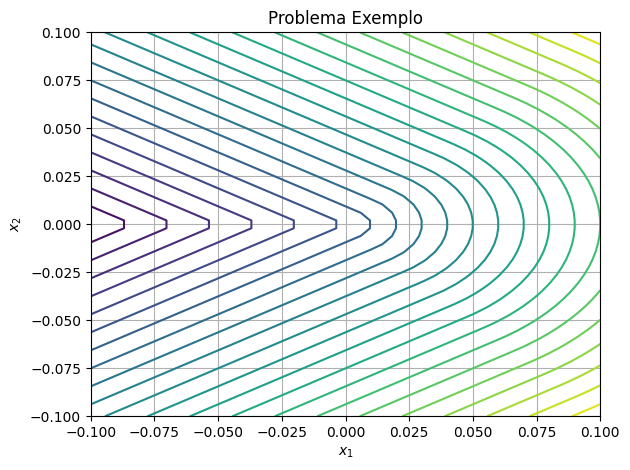

In [4]:
# Definição da função objetivo
def func(x):
    x1, x2 = x[0], x[1]

    # z1 = 0.2*np.floor(np.abs(x1) + 0.49999)*np.sign(x1)
    # z2 = 0.2*np.floor(np.abs(x2) + 0.49999)*np.sign(x2)
    # v1 = np.abs(x1-z1)
    # v2 = np.abs(x2-z2)

    # fx  = 0
    # A = 0.05

    # if np.abs(v1) < A:
    #     fx = 0.15*(z1-0.05*np.sign(z1)**2)*1
    # else:
    #     fx = 1*x1**2
    
    # if np.abs(v2) < A:
    #     fx = fx + 0.15*(z2-0.05*np.sign(z2)**2)*1000
    # else:
    #     fx = fx + 1000*x2**2

    # return fx


    if x1 >= np.abs(x2):
        return 5*np.sqrt((9*x1**2 + 16*x2**2))
    elif 0 < x1 and x1 < np.abs(x2):
        return 9*x1 + 16*np.abs(x2)
    elif x1 <= 0:
        return 9*x1 + 16*np.abs(x2) - x1**9


# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-0.1, 0.1),
                     np.linspace(-0.1, 0.1))

# Avalia função para plotar contorno
f = np.zeros(x1.shape)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        f[i, j] = func([x1[i, j], x2[i, j]])

# Plota trajetória
plt.contour(x1, x2, f, levels=30)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema Exemplo')
plt.grid()

plt.tight_layout()
plt.show()